# Tensorflow快速入门二
## 线性回归

- 运用Tensorflow进行线性回归

In [1]:
#--*coding--:utf-8
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# 参数设定
learning_rate = 0.01
training_epochs = 10000
display_step = 50

In [9]:
# 训练数据
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print "train_X:",train_X
print "train_Y:",train_Y

train_X: [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]
train_Y: [1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ]


In [10]:
# 设置placeholder
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设置模型的权重和偏置
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


In [11]:
# 设置线性回归的方程
pred = tf.add(tf.multiply(X, W), b)

In [12]:
# 设置cost为均方差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降
# 注意，minimize() 可以自动修正w和b，因为默认设置Variables的trainable=True
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
# 初始化所有variables 
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.227176309 W= 0.4662498 b= -0.75714225
Epoch: 0100 cost= 0.209824935 W= 0.45336413 b= -0.66444427
Epoch: 0150 cost= 0.194477022 W= 0.44124478 b= -0.5772583
Epoch: 0200 cost= 0.180901825 W= 0.42984653 b= -0.49525985
Epoch: 0250 cost= 0.168894172 W= 0.41912594 b= -0.41813746
Epoch: 0300 cost= 0.158273280 W= 0.40904313 b= -0.345602
Epoch: 0350 cost= 0.148878932 W= 0.39955983 b= -0.2773801
Epoch: 0400 cost= 0.140569612 W= 0.39064068 b= -0.21321608
Epoch: 0450 cost= 0.133220077 W= 0.38225192 b= -0.15286817
Epoch: 0500 cost= 0.126719445 W= 0.3743621 b= -0.09610926
Epoch: 0550 cost= 0.120969757 W= 0.3669415 b= -0.042726133
Epoch: 0600 cost= 0.115884244 W= 0.35996228 b= 0.007482051
Epoch: 0650 cost= 0.111386232 W= 0.3533981 b= 0.05470412
Epoch: 0700 cost= 0.107407905 W= 0.34722435 b= 0.09911769
Epoch: 0750 cost= 0.103889249 W= 0.34141782 b= 0.14088966
Epoch: 0800 cost= 0.100777164 W= 0.33595657 b= 0.1801773
Epoch: 0850 cost= 0.098024718 W= 0.3308201 b= 0.21712844
Epoch: 0900

Epoch: 7250 cost= 0.076990724 W= 0.24962935 b= 0.8012091
Epoch: 7300 cost= 0.076990724 W= 0.24962772 b= 0.801221
Epoch: 7350 cost= 0.076990716 W= 0.24962604 b= 0.80123293
Epoch: 7400 cost= 0.076990716 W= 0.24962434 b= 0.8012453
Epoch: 7450 cost= 0.076990724 W= 0.24962233 b= 0.8012602
Epoch: 7500 cost= 0.076990716 W= 0.24962065 b= 0.8012715
Epoch: 7550 cost= 0.076990739 W= 0.2496198 b= 0.80127746
Epoch: 7600 cost= 0.076990731 W= 0.24961893 b= 0.8012834
Epoch: 7650 cost= 0.076990731 W= 0.24961823 b= 0.8012894
Epoch: 7700 cost= 0.076990731 W= 0.24961713 b= 0.8012967
Epoch: 7750 cost= 0.076990739 W= 0.24961586 b= 0.80130565
Epoch: 7800 cost= 0.076990716 W= 0.24961482 b= 0.8013146
Epoch: 7850 cost= 0.076990746 W= 0.2496135 b= 0.80132353
Epoch: 7900 cost= 0.076990739 W= 0.2496122 b= 0.8013325
Epoch: 7950 cost= 0.076990746 W= 0.24961098 b= 0.80134135
Epoch: 8000 cost= 0.076990739 W= 0.24961044 b= 0.8013452
Epoch: 8050 cost= 0.076990753 W= 0.24960998 b= 0.8013482
Epoch: 8100 cost= 0.076990753 

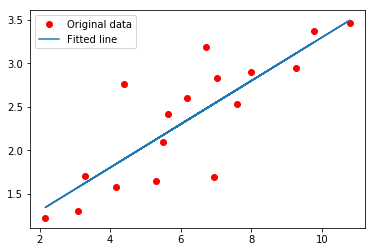

Testing... (Mean square loss Comparison)
('Testing cost=', 0.07910849)
('Absolute mean square loss difference:', 0.0021177456)


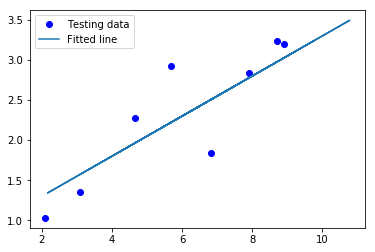

In [14]:
# 开始训练
with tf.Session() as sess:
    sess.run(init)

    # 灌入所有训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 打印出每次迭代的log日志
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    # 作图
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    # 测试样本
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()